# Is Bitcoin under theoretical and empirical aspects money?
27.04.2023, Carl von Ossietzky Universität Oldenburg \
examiner: Prof. Dr. Hans-Michael Trautwein \
author: Henning Dinkela

###### This is the Python code for the empirical investigation of the money functions of Bitcoin. I mainly used Python for data manipulation and data cleaning. For regression of econometric models I used R, which is also available in this github repo.
###### You can download the PDF of my thesis here:

##### Bitcoin volatility

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use("ggplot")

In [3]:
data = pd.read_csv("BTC-USD.csv")

In [4]:
df = pd.DataFrame(data)

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [6]:
df.shape

(3144, 7)

In [7]:
df = df.drop(columns=["High", "Low", "Adj Close", "Volume"])

In [8]:
vola = (df["Close"] - df["Open"])/df["Open"]*100

In [9]:
df["Price Change (in %)"] = vola

In [10]:
df

,Date,Open,Close,Price Change (in %)
0,2014-09-17,465.864014,457.334015,-1.831006
1,2014-09-18,456.859985,424.440002,-7.096262
2,2014-09-19,424.102997,394.795990,-6.910351
3,2014-09-20,394.673004,408.903992,3.605767
4,2014-09-21,408.084991,398.821014,-2.270110
...,...,...,...,...
3139,2023-04-22,27265.894531,27817.500000,2.023060
3140,2023-04-23,27816.144531,27591.384766,-0.808019
3141,2023-04-24,27591.730469,27525.339844,-0.240618
3142,2023-04-25,27514.873047,28307.597656,2.881077


In [11]:
df["Date"] = pd.to_datetime(df["Date"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 3144 non-null   datetime64[ns]
 1   Open                 3144 non-null   float64       
 2   Close                3144 non-null   float64       
 3   Price Change (in %)  3144 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 98.4 KB


In [13]:
df["Vola"] = df["Price Change (in %)"].rolling(30).std()

In [14]:
df[29:]

,Date,Open,Close,Price Change (in %),Vola
29,2014-10-16,394.518005,382.556000,-3.032056,3.902636
30,2014-10-17,382.756012,383.757996,0.261781,3.898165
31,2014-10-18,383.976013,391.441986,1.944385,3.716510
32,2014-10-19,391.253998,389.545990,-0.436547,3.495210
33,2014-10-20,389.230988,382.845001,-1.640668,3.439858
...,...,...,...,...,...
3139,2023-04-22,27265.894531,27817.500000,2.023060,2.212649
3140,2023-04-23,27816.144531,27591.384766,-0.808019,2.148990
3141,2023-04-24,27591.730469,27525.339844,-0.240618,2.149683
3142,2023-04-25,27514.873047,28307.597656,2.881077,2.188350


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 3144 non-null   datetime64[ns]
 1   Open                 3144 non-null   float64       
 2   Close                3144 non-null   float64       
 3   Price Change (in %)  3144 non-null   float64       
 4   Vola                 3115 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 122.9 KB


In [16]:
df_months = df.resample("M", on="Date").mean()

In [17]:
df_months

,Open,Close,Price Change (in %),Vola
Date,,,,
2014-09-30,412.654003,407.182428,-1.196854,NaN
2014-10-31,365.748000,364.148873,-0.389605,3.389536
2014-11-30,364.850235,366.099799,0.425109,3.609730
2014-12-31,343.074836,341.267871,-0.490652,2.831754
2015-01-31,251.799905,248.782547,-0.851235,5.395178
...,...,...,...,...
2022-12-31,16969.578818,16949.608808,-0.108070,2.383041
2023-01-31,20043.860131,20250.717490,1.079461,1.794984
2023-02-28,23304.086007,23304.539202,0.034358,2.574482


In [18]:
df_months.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104 entries, 2014-09-30 to 2023-04-30
Freq: M
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Open                 104 non-null    float64
 1   Close                104 non-null    float64
 2   Price Change (in %)  104 non-null    float64
 3   Vola                 103 non-null    float64
dtypes: float64(4)
memory usage: 4.1 KB


In [19]:
#df_months['Date'] = df_months['Date'].dt.month_name()

Text(0, 0.5, '⌀ der rollenden 30-Tage-Volatilität (pro Monat)')

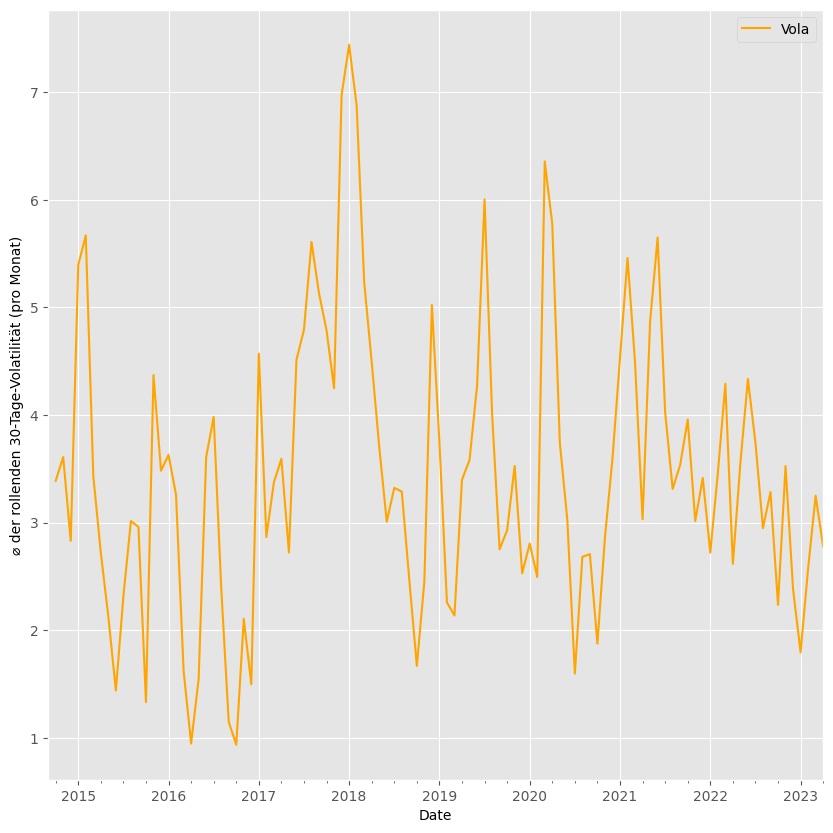

In [20]:
df_months.plot(y = 'Vola', kind = 'line', figsize=(10, 10), color="orange")
plt.ylabel("⌀ der rollenden 30-Tage-Volatilität (pro Monat)")

Text(0, 0.5, 'Rollende 30-Tage-Volatilität pro Tag')

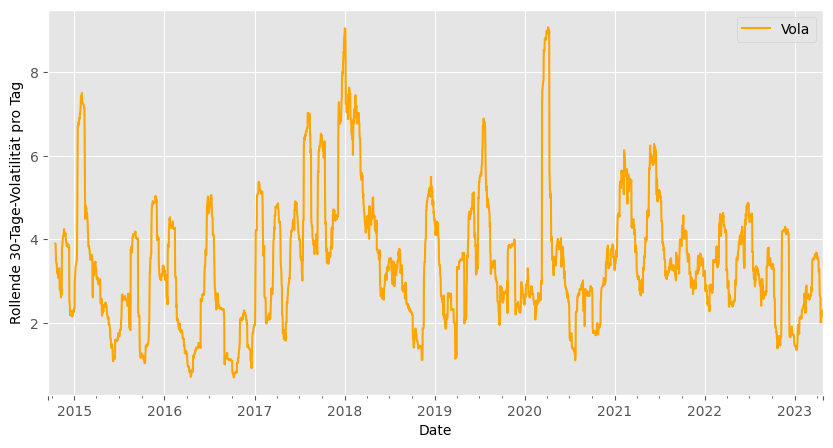

In [21]:
df.plot(x = 'Date', y = 'Vola', kind = 'line', figsize=(10, 5), color="orange")
plt.ylabel("Rollende 30-Tage-Volatilität pro Tag")

In [22]:
df_year = df.resample("Y", on="Date").mean()

In [23]:
df_year

,Open,Close,Price Change (in %),Vola
Date,,,,
2014-12-31,365.058217,363.693085,-0.295195,3.250765
2015-12-31,272.149011,272.453381,0.142118,3.171772
2016-12-31,567.141429,568.492407,0.232391,2.220989
2017-12-31,3970.644848,4006.033629,0.842111,4.445620
2018-12-31,7601.018680,7572.298947,-0.279671,4.070579
2019-12-31,7385.218456,7395.246282,0.249635,3.438487
2020-12-31,11056.787201,11116.378092,0.455531,3.295061
2021-12-31,47402.115663,47436.932021,0.191884,4.100427
2022-12-31,28278.690293,28197.754099,-0.223643,3.254921


Text(0, 0.5, '⌀ der rollenden 30-Tage-Volatilität (pro Jahr)')

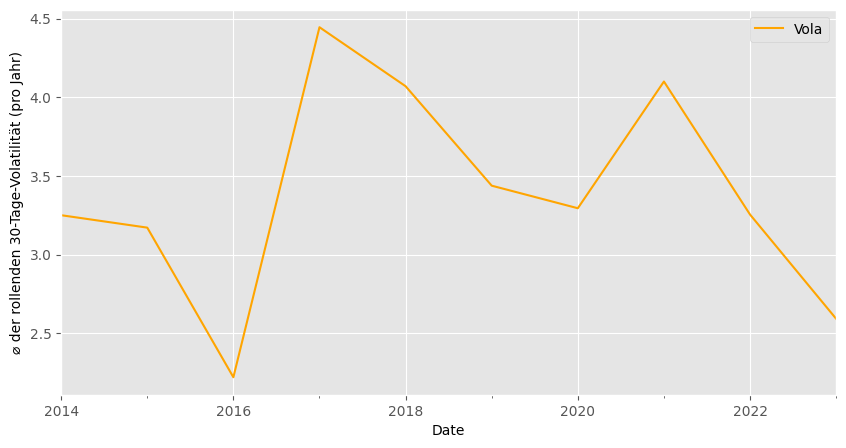

In [24]:
df_year.plot(y = 'Vola', kind = 'line', figsize=(10, 5), color="orange")
plt.ylabel("⌀ der rollenden 30-Tage-Volatilität (pro Jahr)")

##### US-Dollar volatility

In [25]:
usd = pd.read_csv("EUR=X.csv")

In [26]:
usd_df = pd.DataFrame(usd)

In [27]:
usd_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,0.83098,0.83724,0.83056,0.83577,0.83577,0.0
1,2003-12-02,0.83605,0.83710,0.82583,0.82720,0.82720,0.0
2,2003-12-03,0.82713,0.82802,0.82440,0.82488,0.82488,0.0
3,2003-12-04,0.82508,0.83029,0.82345,0.82775,0.82775,0.0
4,2003-12-05,0.82795,0.82878,0.82028,0.82055,0.82055,0.0
...,...,...,...,...,...,...,...
5059,2023-04-21,0.91150,0.91410,0.90971,0.91150,0.91150,0.0
5060,2023-04-24,0.90973,0.91168,0.90627,0.90973,0.90973,0.0
5061,2023-04-25,0.90420,0.91164,0.90350,0.90420,0.90420,0.0
5062,2023-04-26,0.91088,0.91164,0.90138,0.91088,0.91088,0.0


In [28]:
usd_df = usd_df.drop(columns=["High", "Low", "Adj Close", "Volume"])

In [29]:
usd_df

,Date,Open,Close
0,2003-12-01,0.83098,0.83577
1,2003-12-02,0.83605,0.82720
2,2003-12-03,0.82713,0.82488
3,2003-12-04,0.82508,0.82775
4,2003-12-05,0.82795,0.82055
...,...,...,...
5059,2023-04-21,0.91150,0.91150
5060,2023-04-24,0.90973,0.90973
5061,2023-04-25,0.90420,0.90420
5062,2023-04-26,0.91088,0.91088


In [30]:
vola_usd = (usd_df["Close"] - usd_df["Open"])/usd_df["Open"]*100

In [31]:
usd_df["Price Change (in %)"] = vola_usd

In [32]:
usd_df

,Date,Open,Close,Price Change (in %)
0,2003-12-01,0.83098,0.83577,0.576428
1,2003-12-02,0.83605,0.82720,-1.058549
2,2003-12-03,0.82713,0.82488,-0.272025
3,2003-12-04,0.82508,0.82775,0.323605
4,2003-12-05,0.82795,0.82055,-0.893774
...,...,...,...,...
5059,2023-04-21,0.91150,0.91150,0.000000
5060,2023-04-24,0.90973,0.90973,0.000000
5061,2023-04-25,0.90420,0.90420,0.000000
5062,2023-04-26,0.91088,0.91088,0.000000


In [33]:
usd_df["Date"] = pd.to_datetime(usd_df["Date"])

In [34]:
usd_df

,Date,Open,Close,Price Change (in %)
0,2003-12-01,0.83098,0.83577,0.576428
1,2003-12-02,0.83605,0.82720,-1.058549
2,2003-12-03,0.82713,0.82488,-0.272025
3,2003-12-04,0.82508,0.82775,0.323605
4,2003-12-05,0.82795,0.82055,-0.893774
...,...,...,...,...
5059,2023-04-21,0.91150,0.91150,0.000000
5060,2023-04-24,0.90973,0.90973,0.000000
5061,2023-04-25,0.90420,0.90420,0.000000
5062,2023-04-26,0.91088,0.91088,0.000000


In [35]:
usd_df["Vola"] = usd_df["Price Change (in %)"].rolling(30).std()

In [106]:
usd_df[4500:]

,Date,Open,Close,Price Change (in %),Vola
4500,2021-03-01,0.827068,0.82716,0.011124,0.010791
4501,2021-03-02,0.829940,0.82980,-0.016869,0.010599
4502,2021-03-03,0.827470,0.82744,-0.003626,0.010402
4503,2021-03-04,0.829990,0.82983,-0.019277,0.010623
4504,2021-03-05,0.835520,0.83558,0.007181,0.010885
...,...,...,...,...,...
5059,2023-04-21,0.911500,0.91150,0.000000,0.000000
5060,2023-04-24,0.909730,0.90973,0.000000,0.000000
5061,2023-04-25,0.904200,0.90420,0.000000,0.000000
5062,2023-04-26,0.910880,0.91088,0.000000,0.000000


<Axes: title={'center': 'Volatilität'}, xlabel='Date'>

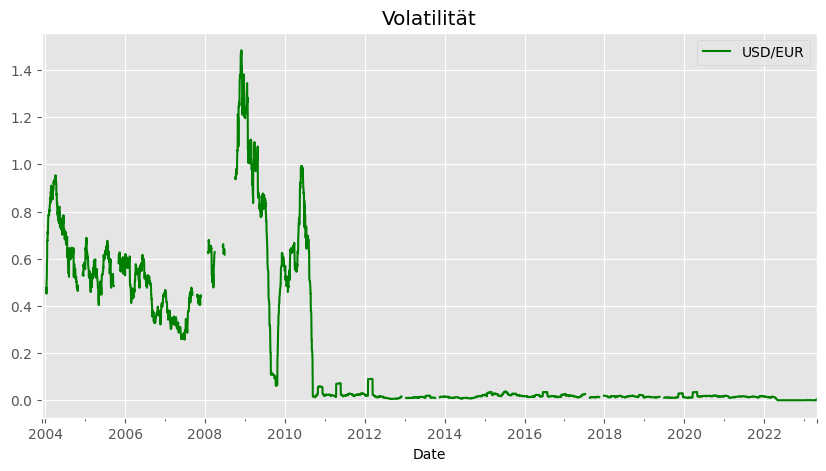

In [103]:
usd_df.plot(x = 'Date', y = 'Vola', kind = 'line', figsize=(10, 5), color="green", title="Volatilität", label="USD/EUR")

##### Gold volatility

In [60]:
gold = pd.read_csv("gold.csv")

In [61]:
gold_df = pd.DataFrame(gold)

In [62]:
gold_df

,Date,Close/Last,Volume,Open,High,Low
0,04/26/2023,1996.0,231110.0,2007.7,2020.2,1993.7
1,04/25/2023,2004.5,214107.0,1999.4,2014.5,1986.2
2,04/24/2023,1999.8,136854.0,1992.0,2001.5,1984.4
3,04/21/2023,1990.5,205700.0,2016.1,2016.8,1982.3
4,04/20/2023,2019.1,158915.0,2007.7,2024.2,2002.2
...,...,...,...,...,...,...
2536,05/03/2013,1464.2,159542.0,1466.2,1487.2,1455.4
2537,05/02/2013,1467.6,138096.0,1457.0,1473.3,1448.1
2538,05/01/2013,1446.2,154718.0,1475.6,1477.4,1439.7
2539,04/30/2013,1472.1,132453.0,1476.6,1479.5,1460.5


In [63]:
gold_df = gold_df.drop(columns=["High", "Low", "Volume"])

In [64]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2541 entries, 0 to 2540
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2541 non-null   object 
 1   Close/Last  2541 non-null   float64
 2   Open        2541 non-null   float64
dtypes: float64(2), object(1)
memory usage: 59.7+ KB


In [65]:
gold_df["Date"] = pd.to_datetime(gold_df["Date"])

In [66]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2541 entries, 0 to 2540
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2541 non-null   datetime64[ns]
 1   Close/Last  2541 non-null   float64       
 2   Open        2541 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 59.7 KB


In [68]:
vola_gold = (gold_df["Close/Last"] - gold_df["Open"])/gold_df["Open"]*100

In [71]:
gold_df['price change in %'] = vola_gold

In [72]:
gold_df

,Date,Close/Last,Open,pirce change in %,price change in %
0,2023-04-26,1996.0,2007.7,-0.582756,-0.582756
1,2023-04-25,2004.5,1999.4,0.255077,0.255077
2,2023-04-24,1999.8,1992.0,0.391566,0.391566
3,2023-04-21,1990.5,2016.1,-1.269778,-1.269778
4,2023-04-20,2019.1,2007.7,0.567814,0.567814
...,...,...,...,...,...
2536,2013-05-03,1464.2,1466.2,-0.136407,-0.136407
2537,2013-05-02,1467.6,1457.0,0.727522,0.727522
2538,2013-05-01,1446.2,1475.6,-1.992410,-1.992410
2539,2013-04-30,1472.1,1476.6,-0.304754,-0.304754


In [73]:
gold_df["Vola"] = gold_df["price change in %"].rolling(30).std()

<Axes: title={'center': 'Volatilität'}, xlabel='Date'>

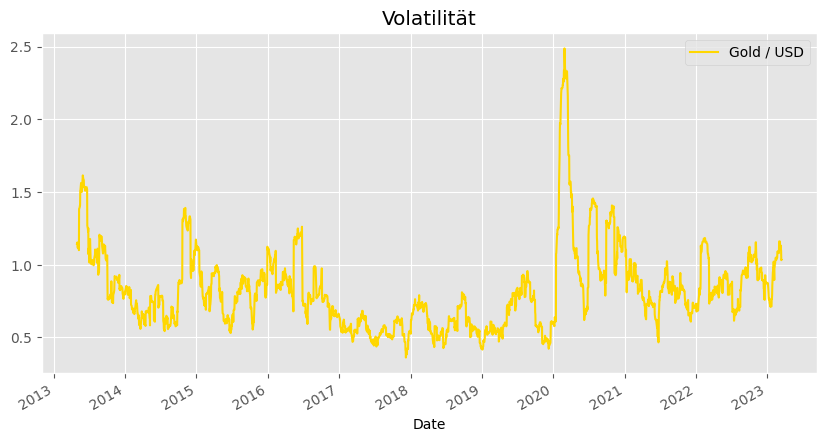

In [77]:
gold_df.plot(x = 'Date', y = 'Vola', kind = 'line', figsize=(10, 5), color="gold", title="Volatilität", label="Gold / USD")

# All volatilities in one plot

Text(0.5, 0, 'Jahre')

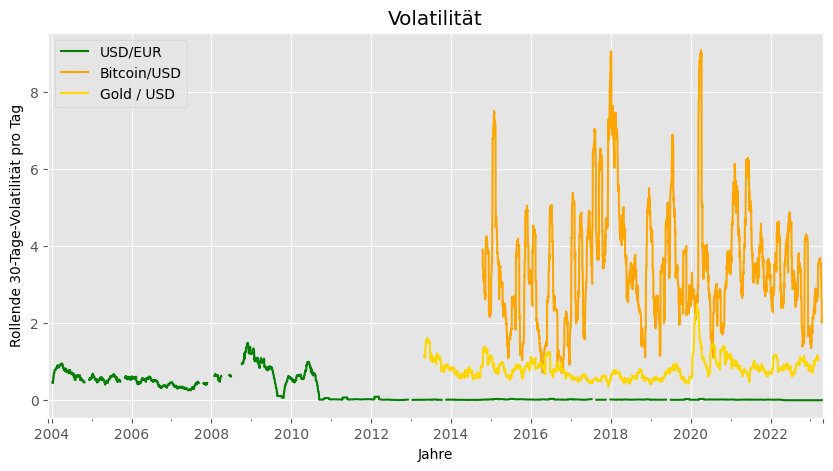

In [100]:
ax = usd_df.plot(x = 'Date', y = 'Vola', kind = 'line', figsize=(10, 5), color="green", title="Volatilität", label="USD/EUR")
df.plot(x = 'Date', y = 'Vola', kind = 'line', figsize=(10, 5), color="orange", label='Bitcoin/USD',ax = ax)
gold_df.plot(x = 'Date', y = 'Vola', kind = 'line', figsize=(10, 5), color="gold", title="Volatilität", label="Gold / USD", ax=ax)
plt.ylabel("Rollende 30-Tage-Volatilität pro Tag")
plt.xlabel("Jahre")

# Regressions
#### Bitcoin volatility as dependent variable